In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 117.80 MiB | 10.26 MiB/s, done.
Updating files: 100% (4/4), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout, Flatten
# The following line was changed to import directly from keras.layers
from keras.layers import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random
import cv2

In [5]:
np.random.seed(0)

In [7]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Set paths to the dataset folders
TRAIN_DIR = '/content/drive/MyDrive/CV_dataset/Train'
TEST_DIR = '/content/drive/MyDrive/CV_dataset/Test'

# Define number of classes
NUM_CLASSES = 43  # Based on the German Traffic Sign dataset

# Function to load images and labels
def load_data(data_dir):
    images = []
    labels = []

    for class_id in range(NUM_CLASSES):
        class_path = os.path.join(data_dir, str(class_id))
        if not os.path.exists(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (32, 32))  # Resize to 32x32

            images.append(img)
            labels.append(class_id)

    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Load the training data
X_train, y_train = load_data(TRAIN_DIR)

# Load the test data
X_test, y_test = load_data(TEST_DIR)

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape images to include channel dimension (grayscale)
X_train = X_train.reshape(-1, 32, 32, 1)
X_test = X_test.reshape(-1, 32, 32, 1)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print dataset shapes for verification
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (23904, 32, 32, 1)
y_train shape: (23904, 43)
X_val shape: (5976, 32, 32, 1)
y_val shape: (5976, 43)
X_test shape: (0, 32, 32, 1)
y_test shape: (0, 43)


In [4]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)



X_train , y_train = train_data['features'], train_data['labels']
X_val , y_val = val_data['features'], val_data['labels']
X_test , y_test = test_data['features'], test_data['labels']

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [6]:
assert(X_train.shape[0] == y_train.shape[0]), "No. of Images is not equals to number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "No. of Images is not equals to number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "No. of Images is not equals to number of labels"

assert(X_train.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_val.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"
assert(X_test.shape[1:] == (32,32,3)), "The Dimesnsions of the images are not 32 x 32 x 3"

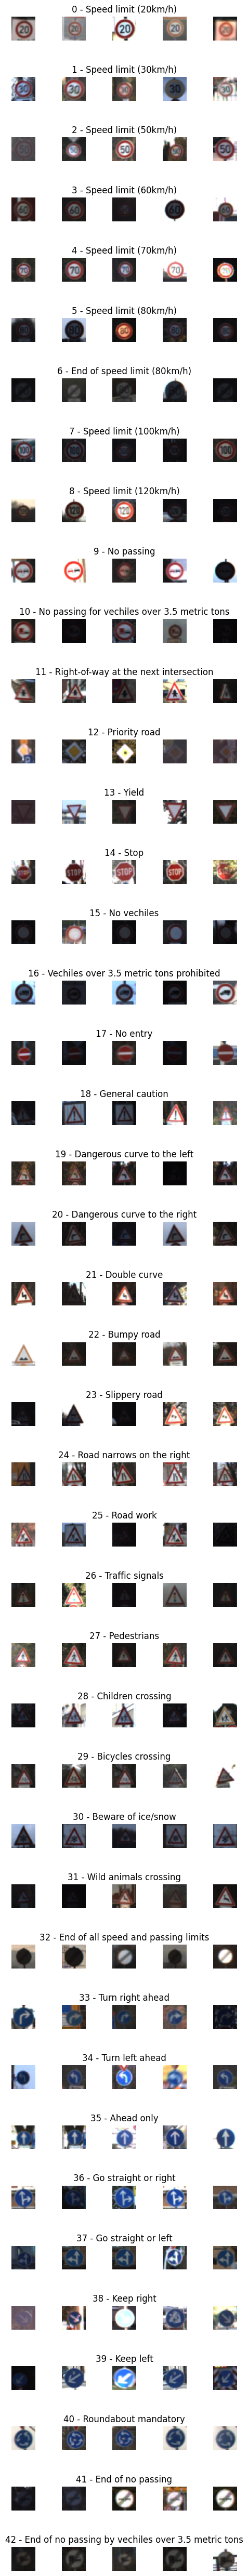

In [7]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
#print(data)

num_of_samples=[]

cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()

for i in range(cols):
    for j, row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
        axs[j][i].axis("off")
        if i == 2:
          axs[j][i].set_title(str(j) + " - " + row["SignName"])
          num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


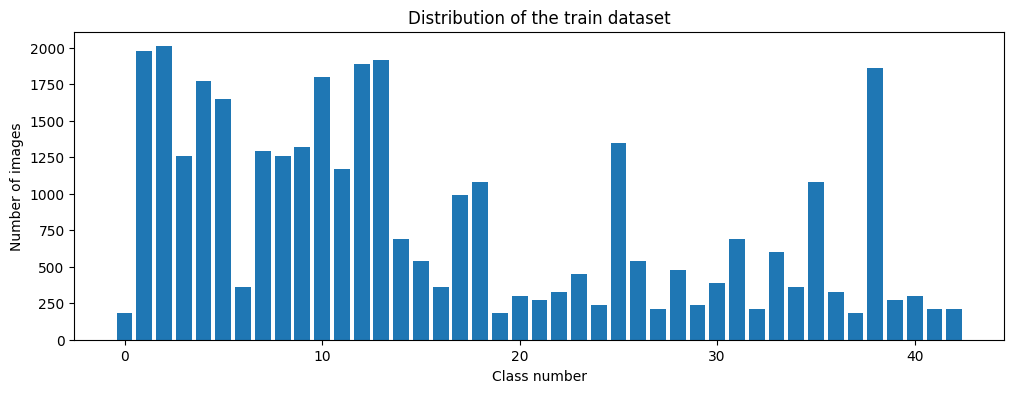

In [8]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

(32, 32, 3)
1


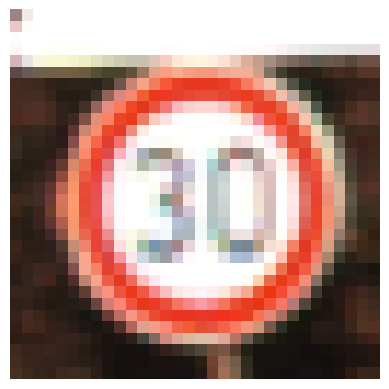

In [9]:

plt.imshow(X_train[3000])
plt.axis("off")
print(X_train[3000].shape)
print(y_train[3000])


(32, 32)


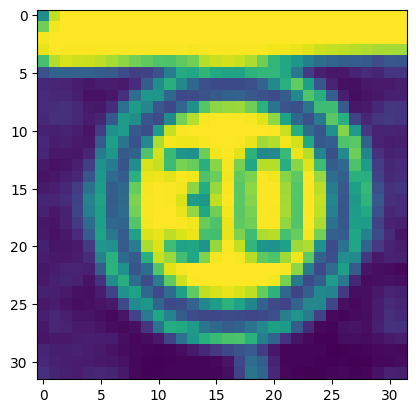

In [10]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[3000])
plt.imshow(img)
#plt.axis("off")
print(img.shape)

(32, 32)


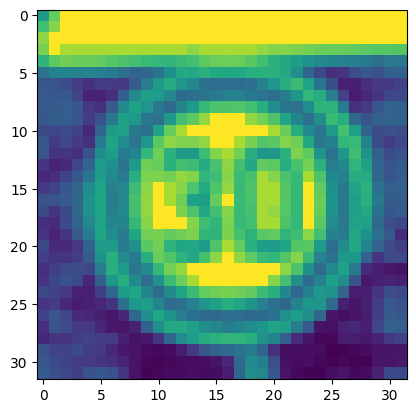

In [11]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img


img = equalize(img)
plt.imshow(img)
print(img.shape)

In [12]:

def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  #normalize the images, i.e. convert the pixel values to fit btwn 0 and 1
  img = img/255
  return img

In [13]:
X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


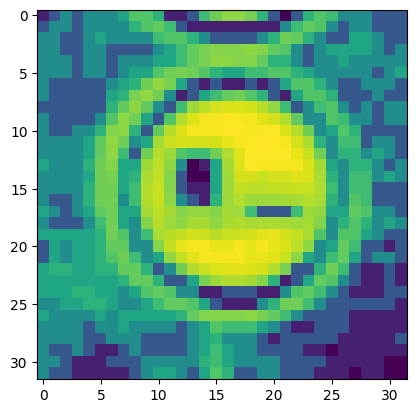

In [14]:

plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
print(X_train.shape)

In [15]:

X_train = X_train.reshape(34799, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1,
                             height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)

datagen.fit(X_train)

(15, 32, 32, 1)


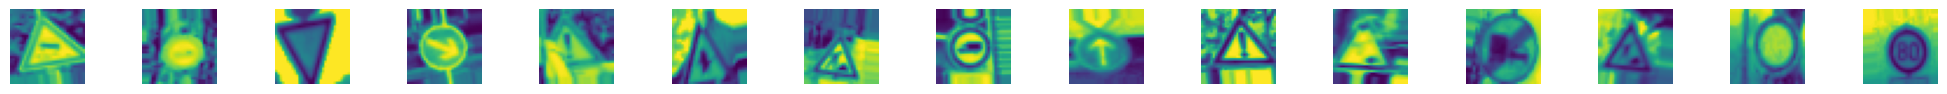

In [17]:
batches = datagen.flow(X_train, y_train, batch_size=15) # Assuming batch_size of 15

X_batch, y_batch = next(batches)

fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()

for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32))
    axs[i].axis("off")

print(X_batch.shape)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


In [19]:

y_train = to_categorical(y_train, 43)
y_val = to_categorical(y_val, 43)
y_test = to_categorical(y_test, 43)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the number of classes (update this based on your dataset)
num_classes = 10  # Example: For CIFAR-10, there are 10 classes

def better_model():
    model = Sequential()
    # Add the convolutional layers
    model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(Conv2D(60, (5, 5), activation='relu'))
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Add another set of convolutional layers
    model.add(Conv2D(30, (3, 3), activation='relu'))
    model.add(Conv2D(30, (3, 3), activation='relu'))
    # Pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Flatten the image to a 1-dimensional array
    model.add(Flatten())
    # Add a dense layer
    model.add(Dense(500, activation='relu'))
    # Dropout layer
    model.add(Dropout(0.5))
    # Define the output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile model
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Create and summarize the model
model = better_model()
print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           5,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 361,490 (1.38 MB)

 Trainable params: 361,490 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

None


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load or generate your dataset (update this section with actual loading code)
# X_train, X_val: Normalized grayscale images, shape (num_samples, 32, 32, 1)
# y_train, y_val: Class indices, shape (num_samples,)
assert X_train.shape[-1] == 1, "Ensure X_train has 1 channel (grayscale)."

# Normalize input images
X_train = X_train / 255.0
X_val = X_val / 255.0

# Verify that y_train and y_val contain integers
print("y_train unique values:", np.unique(y_train))  # Check before conversion
print("y_val unique values:", np.unique(y_val))    # Check before conversion

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train)

def better_model():
    # Set the correct number of classes for the German Traffic Sign dataset
    num_classes = 43

    model = Sequential([
        Conv2D(60, (5, 5), activation='relu', input_shape=(32, 32, 1)),
        Conv2D(60, (5, 5), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(30, (3, 3), activation='relu'),
        Conv2D(30, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(500, activation='relu'),
        Dropout(0.5),
        # Output layer with the correct number of classes
        Dense(num_classes, activation='softmax'),
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ... (rest of your code) ...

# Instantiate the model
model = better_model()

# Model Summary
print(model.summary())

# Train the Model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=50),
    steps_per_epoch=len(X_train) // 50,
    epochs=30,
    validation_data=(X_val, y_val),
    shuffle=True
)

# Save the model
model.save('traffic_sign_classifier.h5')

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


y_train unique values: [0. 1.]
y_val unique values: [0. 1.]


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 24, 24, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 10, 10, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 30)            │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 4, 4, 30)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 480)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 500)                 │         240,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 43)                  │          21,543 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 378,023 (1.44 MB)

 Trainable params: 378,023 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


695/695 ━━━━━━━━━━━━━━━━━━━━ 394s 565ms/step - accuracy: 0.0513 - loss: 3.5256 - val_accuracy: 0.0544 - val_loss: 3.5524
Epoch 2/30
  1/695 ━━━━━━━━━━━━━━━━━━━━ 4:59 431ms/step - accuracy: 0.0600 - loss: 3.3939

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


695/695 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.0600 - loss: 3.3939 - val_accuracy: 0.0544 - val_loss: 3.5528
Epoch 3/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 425s 560ms/step - accuracy: 0.0521 - loss: 3.4883 - val_accuracy: 0.0544 - val_loss: 3.5506
Epoch 4/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 12s 17ms/step - accuracy: 0.1000 - loss: 3.4557 - val_accuracy: 0.0544 - val_loss: 3.5507
Epoch 5/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 387s 557ms/step - accuracy: 0.0582 - loss: 3.4837 - val_accuracy: 0.0544 - val_loss: 3.5515
Epoch 6/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.0200 - loss: 3.5502 - val_accuracy: 0.0544 - val_loss: 3.5518
Epoch 7/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 386s 555ms/step - accuracy: 0.0615 - loss: 3.4793 - val_accuracy: 0.2519 - val_loss: 2.8681
Epoch 8/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.1400 - loss: 3.0148 - val_accuracy: 0.2562 - val_loss: 2.8672
Epoch 9/30
695/695 ━━━━━━━━━━━━━━━━━━━━ 389s 559ms/step - accuracy: 0.2816 - loss: 2.5530 - val

138/138 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9264 - loss: 0.2754
Validation Loss: 0.2598821520805359
Validation Accuracy: 0.924263060092926


Text(0.5, 0, 'epoch')

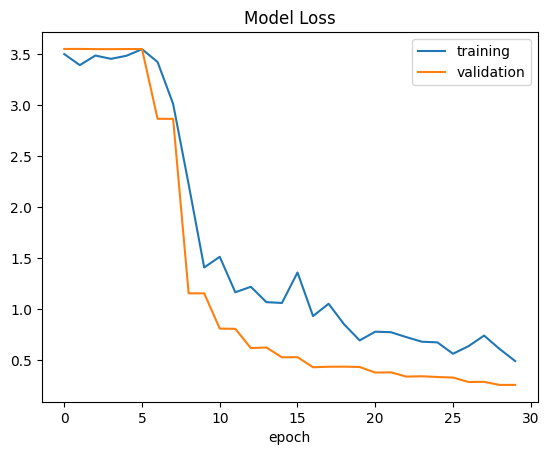

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Model Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

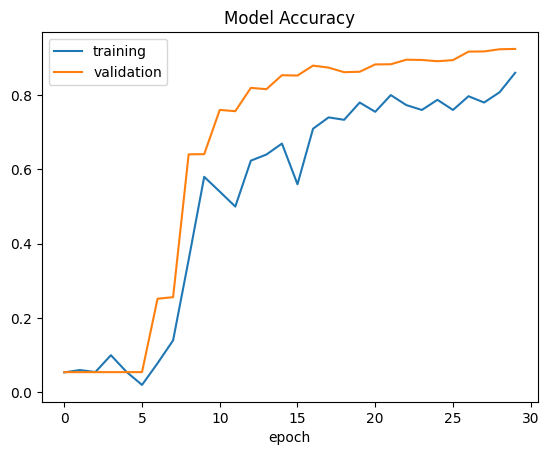

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']) # Changed 'val_acc' to 'val_accuracy'
plt.legend(['training', 'validation'])
plt.title('Model Accuracy')
plt.xlabel('epoch')

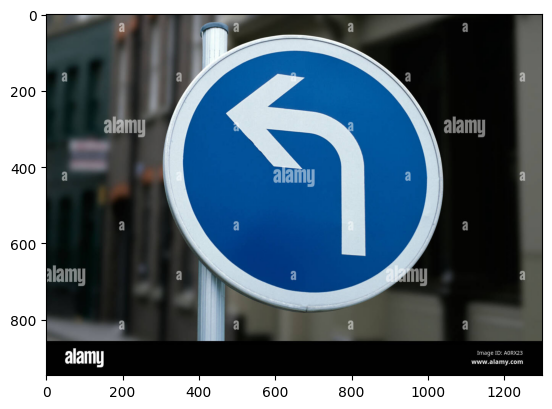

In [40]:

import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))


(32, 32)


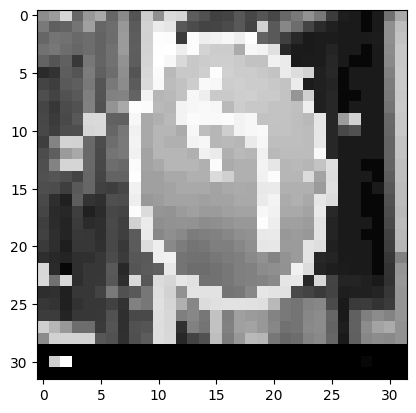

In [41]:

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [42]:
img = img.reshape(1, 32, 32, 1)

In [43]:
import numpy as np

# ... (your existing code) ...

# Predict the class probabilities
predictions = model.predict(img)

# Get the class with the highest probability
predicted_class = np.argmax(predictions)

# Print the predicted sign
print("The Predicted sign:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
The Predicted sign: 1


In [32]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model # deletes the existing model

In [33]:
# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')


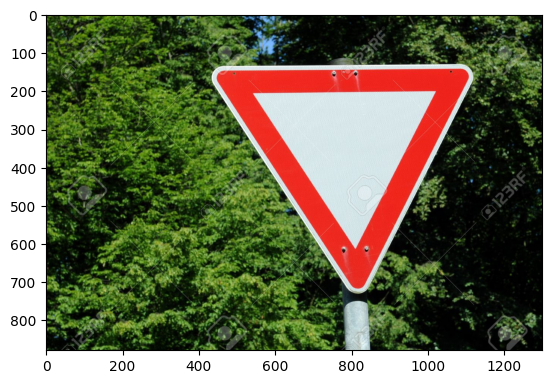

In [34]:

#Testing the Saved Model

#fetch image

import requests
from PIL import Image
url = 'https://previews.123rf.com/images/pejo/pejo0907/pejo090700003/5155701-german-traffic-sign-no-205-give-way.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

(32, 32)


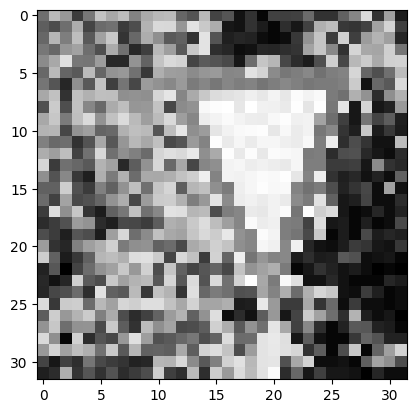

In [35]:

#Preprocess image

img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)


In [39]:
img = img.reshape(1, 32, 32, 1)
predictions = model.predict(img)  # Get prediction probabilities
predicted_class = np.argmax(predictions)  # Get the class with highest probability
print("The Predicted sign: "+ str(predicted_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
The Predicted sign: 13


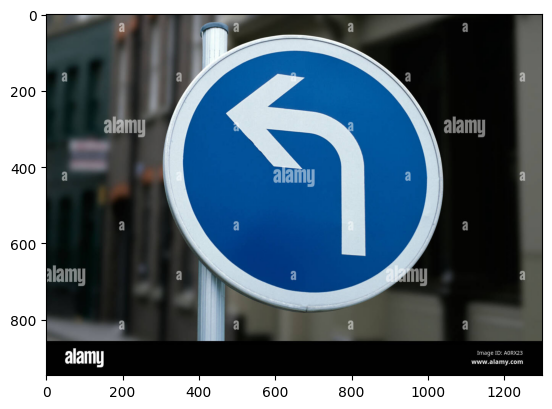

In [44]:
import requests
from PIL import Image
url = 'https://c8.alamy.com/comp/A0RX23/cars-and-automobiles-must-turn-left-ahead-sign-A0RX23.jpg'
r = requests.get(url, stream=True)
img = Image.open(r.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

In [45]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

In [46]:
def equalize(img):
  img = cv2.equalizeHist(img)
  return img

In [47]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  #normalize the images, i.e. convert the pixel values to fit btwn 0 and 1
  img = img/255
  return img

(32, 32)


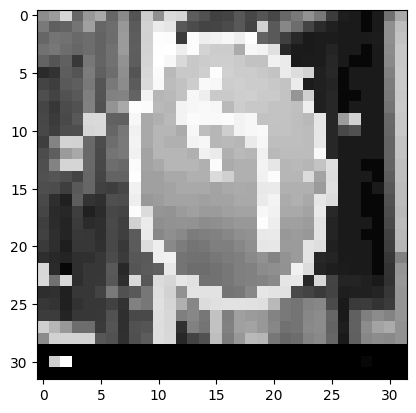

In [48]:
img = np.asarray(img)
img = cv2.resize(img, (32, 32))
img = preprocessing(img)
plt.imshow(img, cmap = plt.get_cmap('gray'))
print(img.shape)

In [49]:
img = img.reshape(1, 32, 32, 1)
predictions = model.predict(img)  # Get prediction probabilities
predicted_class = np.argmax(predictions)  # Get the class with highest probability
print("The Predicted sign: "+ str(predicted_class))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
The Predicted sign: 1
